<a href="https://colab.research.google.com/github/nikitansg/House-Price-Prediction/blob/main/HousePrices_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the librares

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Content/housing_train.csv')

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,...,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,...,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Exploratory Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# To ensure that all the values are printed
pd.set_option('display.max_rows',100)

In [ ]:
dataset.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
index = dataset.columns

In [ ]:
# For better visibility printing sum of missing values of only those columns that have missing values
ser_index = []
ser_data =[]
for i in index:
    if(dataset.isna().sum()[i]):
        ser_data.append(dataset.isna().sum()[i])
        ser_index.append(i)
#print(ser_data)
#print(ser_index)
only_missing_sum = pd.Series(ser_data,ser_index)
print(only_missing_sum)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Observation:**
Since Alley, PoolQC, Fence, MiscFeature have large number of missing values, these columns can be dropped.

In [ ]:
# Using describe function for numerical values
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#Using describe function for categorical values
dataset.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# Data Cleaning and Engineering

In [ ]:
df = dataset.copy()

In [ ]:
df = df.drop(columns = ['Alley','PoolQC','Fence','MiscFeature','Id'])

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [ ]:
for i in df.columns:
    if(df.isna().sum()[i]):
        if(df[i].dtype == object):
            if(i == 'Electrical'):
                df[i].fillna(value = df[i].mode()[0],inplace = True)
            else:
                if(i == 'LotFrontage'):
                    df[i].fillna(value = df[i].mean(),inplace = True)
                else:
                    df[i].fillna(value = 'None', inplace= True)
        else:
            df[i].fillna(value=0, inplace = True)

In [ ]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [ ]:
col_list = list(df.columns)
cat_col_list = []
for i in col_list:
    if(df[i].dtype == object):
        cat_col_list.append(i)
print(cat_col_list)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
!pip install category-encoders

     |████████████████████████████████| 82 kB 386 kB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ord_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','LotShape','LandContour','Utilities','LandSlope']
ord_encoder= ce.OrdinalEncoder(cols=ord_cols,return_df=True,
                           mapping=[{'col':'ExterQual',
'mapping':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                   {'col':'ExterCond',
'mapping':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                   {'col':'BsmtQual',
'mapping':{'None':0,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                   {'col':'BsmtCond',
'mapping':{'None':0,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                   {'col':'BsmtExposure',
'mapping':{'None':0,'Gd':4,'Av':4,'Mn':3,'No':1}},
                                    {'col':'BsmtFinType1',
'mapping':{'None':0,'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}},
                                    {'col':'BsmtFinType2',
'mapping':{'None':0,'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1}},
                                    {'col':'HeatingQC',
'mapping':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                    {'col':'KitchenQual',
'mapping':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                    {'col':'FireplaceQu',
'mapping':{'None':0,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                    {'col':'GarageFinish',
'mapping':{'None':0,'Fin':3,'RFn':2,'Unf':1}},
                                    {'col':'GarageQual',
'mapping':{'None':0,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                     {'col':'GarageCond',
'mapping':{'None':0,'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}},
                                   {'col':'LotShape',
'mapping':{'Reg':4,'IR1':3,'IR2':2,'IR3':1}},
                                   {'col':'LandContour',
'mapping':{'Lvl':4,'Bnk':3,'HLS':2,'Low':1}},
                                   {'col':'Utilities',
'mapping':{'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}},
                                    {'col':'LandSlope',
'mapping':{'Gtl':3,'Mod':2,'Sev':1}}])

df_ord_encoded = ord_encoder.fit_transform(df)

In [ ]:
pd.set_option('display.max_columns',100)
df_ord_encoded.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,4,4,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,4,4,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,2,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,3,4,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,3,6,486,1,0,434,920,GasA,5,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,2,2,608,3,3,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,3,4,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216,1,0,540,756,GasA,4,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,1,3,642,3,3,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,3,4,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,4,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,2,3,836,3,3,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
bin_col_list = []
for i in cat_col_list:
    if (i not in ord_cols):
        bin_col_list.append(i)
print(bin_col_list)

['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
encoder= ce.BinaryEncoder(cols= bin_col_list, return_df=True)
df_encoded = encoder.fit_transform(df_ord_encoded)

In [ ]:
df_encoded.head()

,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street_0,Street_1,LotShape,LandContour,Utilities,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition2_0,Condition2_1,Condition2_2,Condition2_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,...,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional_0,Functional_1,Functional_2,Fireplaces,FireplaceQu,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive_0,PavedDrive_1,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SalePrice
0,60,0,0,1,65.0,8450,0,1,4,4,4,0,0,1,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,2003,2003,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,1,0,0,0,0,1,2003.0,2,2,548,3,3,0,1,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,208500
1,20,0,0,1,80.0,9600,0,1,4,4,4,0,1,0,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,6,8,1976,1976,0,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,0,0,1,1,3,0,0,1,1976.0,2,2,460,3,3,0,1,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,181500
2,60,0,0,1,68.0,11250,0,1,3,4,4,0,0,1,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,2001,2002,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,920,866,0,1786,1,0,2,1,3,1,4,6,0,0,1,1,3,0,0,1,2001.0,2,2,608,3,3,0,1,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,223500
3,70,0,0,1,60.0,9550,0,1,3,4,4,0,1,1,3,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,1915,1970,0,0,1,0,0,0,1,0,0,1,1,...,0,1,0,0,1,961,756,0,1717,1,0,1,0,3,1,4,7,0,0,1,1,4,0,1,0,1998.0,1,3,642,3,3,0,1,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,1,0,140000
4,60,0,0,1,84.0,14260,0,1,3,4,4,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,8,5,2000,2000,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,0,0,1,1,3,0,0,1,2000.0,2,3,836,3,3,0,1,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,1,250000


In [ ]:
df_encoded.columns

Index(['MSSubClass', 'MSZoning_0', 'MSZoning_1', 'MSZoning_2', 'LotFrontage',
       'LotArea', 'Street_0', 'Street_1', 'LotShape', 'LandContour',
       ...
       'MoSold', 'YrSold', 'SaleType_0', 'SaleType_1', 'SaleType_2',
       'SaleType_3', 'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SalePrice'],
      dtype='object', length=127)

In [ ]:
final_df = df_encoded.copy()

In [ ]:
final_df['YearBuilt'] =final_df['YearBuilt'].apply(lambda x: 2022-x) # to convert yearBuilt to no of year past
final_df['YearRemodAdd'] =final_df['YearRemodAdd'].apply(lambda x: 2022-x)
final_df['GarageYrBlt'] =final_df['GarageYrBlt'].apply(lambda x: 2022-x)
final_df['YrSold'] =final_df['YrSold'].apply(lambda x: 2022-x)

In [ ]:
pd.set_option('display.max_columns',100)
final_df.head()

,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street_0,Street_1,LotShape,LandContour,Utilities,LotConfig_0,LotConfig_1,LotConfig_2,LandSlope,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition2_0,Condition2_1,Condition2_2,Condition2_3,BldgType_0,BldgType_1,BldgType_2,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,...,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional_0,Functional_1,Functional_2,Fireplaces,FireplaceQu,GarageType_0,GarageType_1,GarageType_2,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive_0,PavedDrive_1,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleCondition_0,SaleCondition_1,SaleCondition_2,SalePrice
0,60,0,0,1,65.0,8450,0,1,4,4,4,0,0,1,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,19,19,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,1,0,0,0,0,1,19.0,2,2,548,3,3,0,1,0,61,0,0,0,0,0,2,14,0,0,0,1,0,0,1,208500
1,20,0,0,1,80.0,9600,0,1,4,4,4,0,1,0,3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,6,8,46,46,0,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,0,0,1,1,3,0,0,1,46.0,2,2,460,3,3,0,1,298,0,0,0,0,0,0,5,15,0,0,0,1,0,0,1,181500
2,60,0,0,1,68.0,11250,0,1,3,4,4,0,0,1,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,21,20,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,920,866,0,1786,1,0,2,1,3,1,4,6,0,0,1,1,3,0,0,1,21.0,2,2,608,3,3,0,1,0,42,0,0,0,0,0,9,14,0,0,0,1,0,0,1,223500
3,70,0,0,1,60.0,9550,0,1,3,4,4,0,1,1,3,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,7,5,107,52,0,0,1,0,0,0,1,0,0,1,1,...,0,1,0,0,1,961,756,0,1717,1,0,1,0,3,1,4,7,0,0,1,1,4,0,1,0,24.0,1,3,642,3,3,0,1,0,35,272,0,0,0,0,2,16,0,0,0,1,0,1,0,140000
4,60,0,0,1,84.0,14260,0,1,3,4,4,0,1,0,3,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,8,5,22,22,0,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,1,1145,1053,0,2198,1,0,2,1,4,1,4,9,0,0,1,1,3,0,0,1,22.0,2,3,836,3,3,0,1,192,84,0,0,0,0,0,12,14,0,0,0,1,0,0,1,250000


# Data Visualization and Experimentation

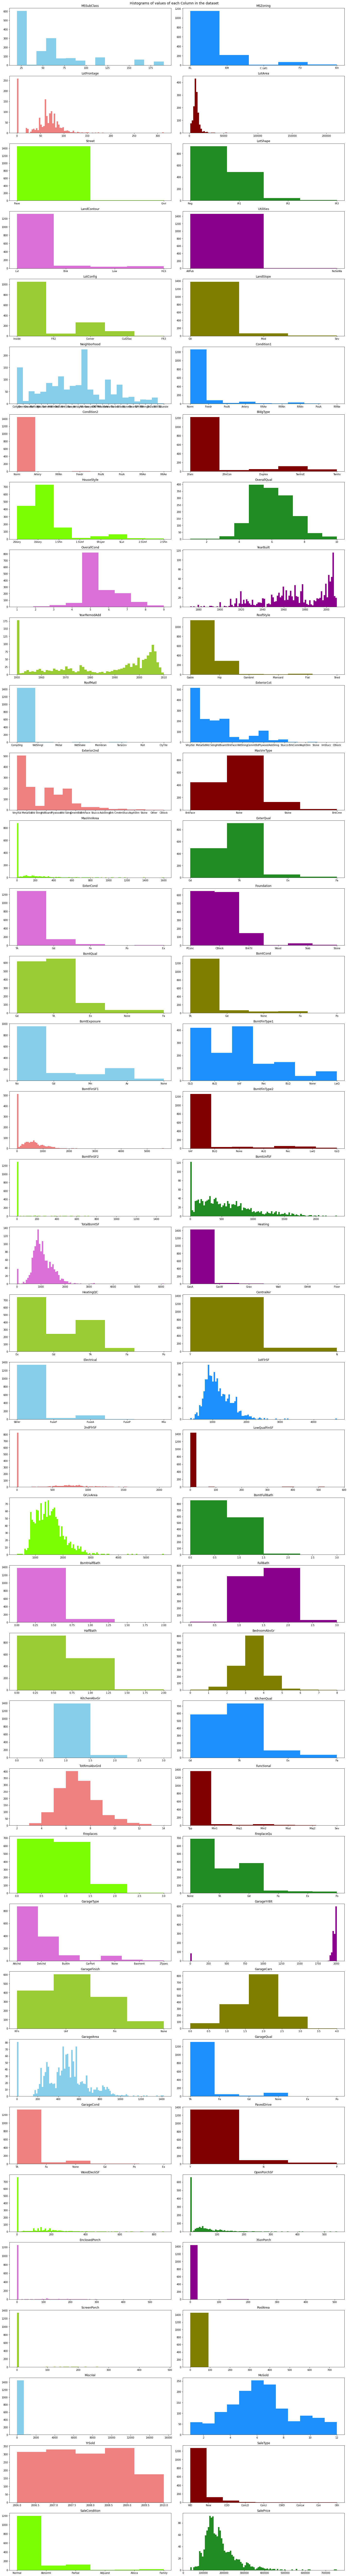

In [ ]:
color_list = ['skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive',
              'skyblue','dodgerblue','lightcoral','maroon','lawngreen','forestgreen','orchid','darkmagenta','yellowgreen','olive']
fig = plt.figure(figsize = (20,150))
plt.suptitle('Histograms of values of each Column in the dataset',fontsize=14)
for i in range(df.shape[1]):
  plt.subplot(int(df.shape[1]/2),2,i+1)
  f = plt.gca()
  f.set_title(df.columns.values[i])
# the vals variable holds all the unique values of the column and
# also helps to scale the graph. Lets say u are plotting for age
# 100 then vals not only identidies the unique age with 100 values
# but also scales the graphs according to it
  vals = np.size(df.iloc[:,i].unique())
  if vals>= 100:
    vals = 100
# the condition is to make sure that it doesnt take much time
#to plot the graphs at the same time ensuring that your system does not crash
# depending upon how powerful ur system is. So if the unique values in the vals exceed 100
# the bins would be defaulted to 100.
  plt.hist(df.iloc[:,i], bins = vals, color= color_list[i])
plt.tight_layout(rect = (0,0,1,0.98))
#the layout is for rectangular show play with it to better fit ur screen
# also if u want make a few histograms at a time

In [ ]:
df2 = df.drop(columns=['SalePrice'])

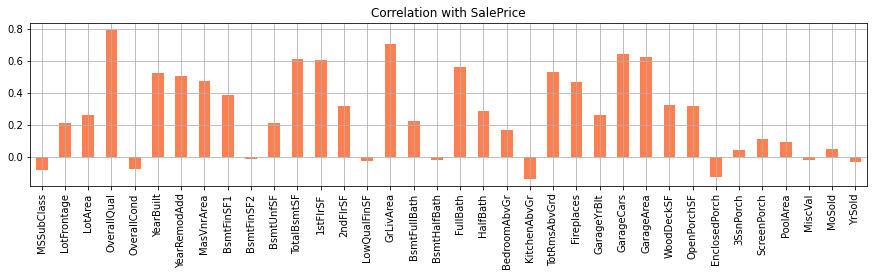

In [ ]:
# Correlation with response variable (Note: Models like RF are not linear like these)
# corrwidth creates a corelation within the columns
# bar creates the bar graph
df2.corrwith(df.SalePrice).plot.bar(
    figsize = (15,3), title = 'Correlation with SalePrice', fontsize = 10,
    rot = 90, grid = 'True', color = 'coral'
)
#just play with the numbers to better fit the graph in your screen
# the negative and positive side of the graph shows the relation between the variable and the target
# negative means inverse and positive means direct relation
# In this the target is SalePrice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


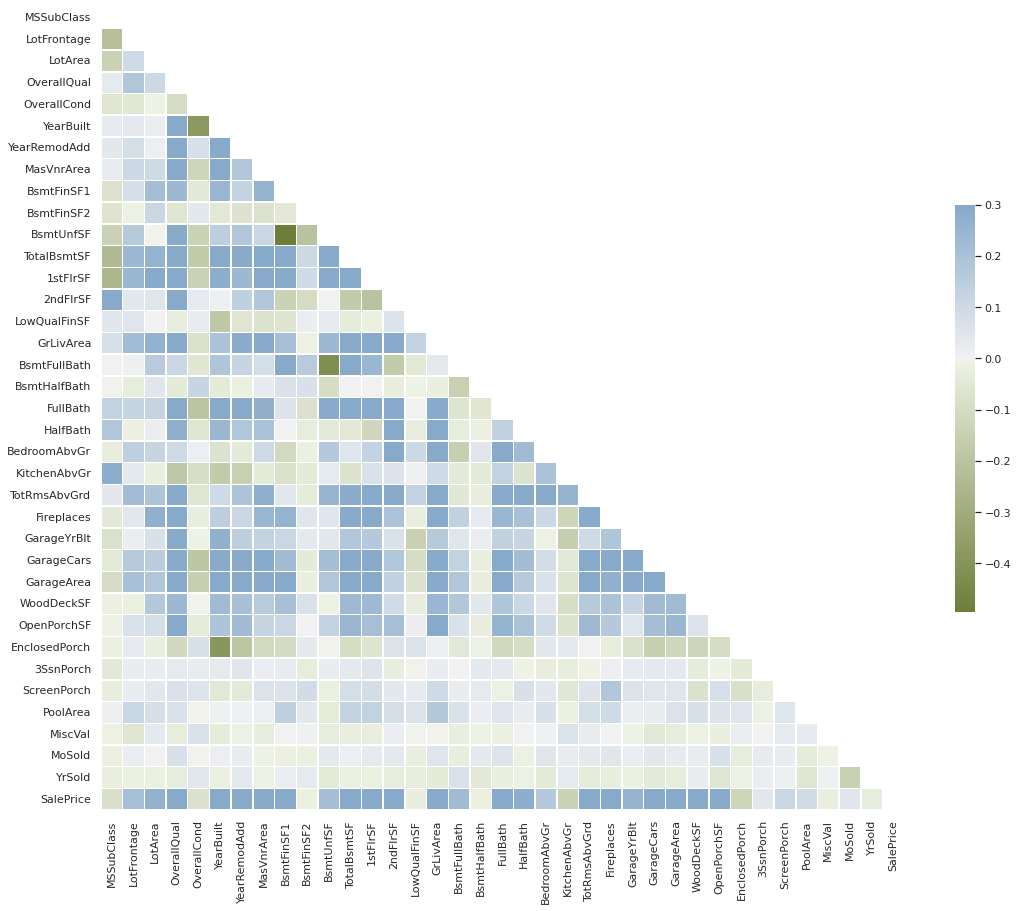

In [ ]:
import seaborn as sns
## Correlation Matrix
#set -Set the aesthetic style of the plots. the parameters are style and rc basically make the backgroud
#style is the kind of plot we will get it can changed to dark,ticks,whitegrid etc also its kind of a dictionary
#rc- Parameter mappings to override the values in the preset seaborn style dictionaries.
#This only updates parameters that are considered part of the style definition.
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
#Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True
# go through this https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.triu_indices_from.html

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(100, 245, as_cmap=True)#visit for more details: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
#cmap is short for colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data Splitting

In [ ]:
X = final_df.copy()
X= X.drop(columns = ['SalePrice'])
y = final_df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=50)

In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Model creation

Multiple Linear Regression : Nandan

Ridge: Nikita Bhatia

Lasso: Nikita Sharma

Nonlinear(SVR) : Pritesh

Rbf
poly

Ensemble: Nikhita Ramachandran
Gradient Boosting Regressor



In [ ]:
# Nandan jha
# Model 1 Linear Regression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/(y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
results = pd.DataFrame([['LinearRegression',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])
results

MAE:  19458.62666963275 
MSE:  745256493.2728282 
RMSE:  27299.38631678061 
RMSE_NOR : 0.03791054897483767


,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.62667,7.452565e+08,27299.386317,0.037911


In [ ]:
# Nikita Bhatia
# Model 2 Ridge
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/(y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['Ridge',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  19452.17877460919 
MSE:  744151677.2156466 
RMSE:  27279.143630540286 
RMSE_NOR : 0.03788243803713413


,model,MAE,MSE,RMSE,RMSE_NOR
0,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.626670,7.452565e+08,27299.386317,0.037911
1,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882


In [ ]:
# Nikita Sharma
# Model 3 Lasso
from sklearn.linear_model import Lasso

# define model
model = Lasso(alpha=1.0)
# fit model:training and testing
model.fit(X_train, y_train)
#evaluate model
y_pred = model.predict(X_test)
# calculating MAE, MSE, RMSE
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE / (y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['Lasso',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  19458.25587682336 
MSE:  744903895.7073809 
RMSE:  27292.927576707138 
RMSE_NOR : 0.03790157974823932


,model,MAE,MSE,RMSE,RMSE_NOR
0,Lasso,19458.255877,7.449039e+08,27292.927577,0.037902


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.626670,7.452565e+08,27299.386317,0.037911
1,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882
2,Lasso,19458.255877,7.449039e+08,27292.927577,0.037902


In [ ]:
# Pritesh
# Model 4 SVR Poly
from sklearn.svm import SVR
from sklearn import metrics
svr_poly = SVR(kernel = 'poly')

#training and testing
svr_poly.fit(X_train,y_train)
y_pred_poly = svr_poly.predict(X_test)

# calculating MAE, MSE, RMSE
mae_poly = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
rmse_poly_nor = rmse_poly / (y.max() - y.min())
print("MAE: ", mae_poly,"\nMSE: ",mse_poly,"\nRMSE: ", rmse_poly,"\nRMSE_NOR: ",rmse_poly_nor)

model_results = pd.DataFrame([['SVR-Poly',mae_poly,mse_poly,rmse_poly,rmse_poly_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])

model_results

MAE:  57423.88611722707 
MSE:  6970351604.148208 
RMSE:  83488.63158627172 
RMSE_NOR:  0.11594032993510862


,model,MAE,MSE,RMSE,RMSE_NOR
0,SVR-Poly,57423.886117,6.970352e+09,83488.631586,0.11594


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.626670,7.452565e+08,27299.386317,0.037911
1,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882
2,Lasso,19458.255877,7.449039e+08,27292.927577,0.037902
3,SVR-Poly,57423.886117,6.970352e+09,83488.631586,0.115940


In [ ]:
# Pritesh
# Model 5 SVR RBF

svr_rbf = SVR(kernel = 'rbf')

# training and testing
svr_rbf.fit(X_train,y_train)
y_pred_rbf = svr_rbf.predict(X_test)

# calculating MAE, MSE, RMSE , RMSE_NOR
mae_rbf = metrics.mean_absolute_error(y_test, y_pred_rbf)
mse_rbf = metrics.mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(mse_rbf)
rmse_rbf_nor = rmse_rbf / (y.max() - y.min())

print("MAE: ", mae_rbf,"\nMSE: ",mse_rbf,"\nRMSE: ", rmse_rbf,"\nRMSE_NOR :",rmse_rbf_nor)
model_results = pd.DataFrame([['SVR-rbf',mae_rbf,mse_rbf,rmse_rbf,rmse_rbf_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])


model_results

MAE:  57417.95237791865 
MSE:  6969720901.89056 
RMSE:  83484.85432634209 
RMSE_NOR : 0.11593508446929883


,model,MAE,MSE,RMSE,RMSE_NOR
0,SVR-rbf,57417.952378,6.969721e+09,83484.854326,0.115935


In [ ]:
results = results.append(model_results, ignore_index = True)
results

,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.626670,7.452565e+08,27299.386317,0.037911
1,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882
2,Lasso,19458.255877,7.449039e+08,27292.927577,0.037902
3,SVR-Poly,57423.886117,6.970352e+09,83488.631586,0.115940
4,SVR-rbf,57417.952378,6.969721e+09,83484.854326,0.115935


In [ ]:
# Nikhita Ramachandran
# Model 6 GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)

# Training and Testing
y_pred = reg.predict(X_test)

# Calculating MAE,MSE,RMSE,RMSE_nor
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/ (y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['GBR',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])
model_results



MAE:  16221.127769937964 
MSE:  670169580.3262504 
RMSE:  25887.633733623676 
RMSE_NOR : 0.035950053789228824


,model,MAE,MSE,RMSE,RMSE_NOR
0,GBR,16221.12777,6.701696e+08,25887.633734,0.03595


In [ ]:
results = results.append(model_results, ignore_index = True)
results


,model,MAE,MSE,RMSE,RMSE_NOR
0,LinearRegression,19458.626670,7.452565e+08,27299.386317,0.037911
1,Ridge,19452.178775,7.441517e+08,27279.143631,0.037882
2,Lasso,19458.255877,7.449039e+08,27292.927577,0.037902
3,SVR-Poly,57423.886117,6.970352e+09,83488.631586,0.115940
4,SVR-rbf,57417.952378,6.969721e+09,83484.854326,0.115935
5,GBR,16221.127770,6.701696e+08,25887.633734,0.035950


# Checking Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg, X= X_train, y = y_train,
                             cv = 10)
print("Gradient Boosting Regressor Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Gradient Boosting Regressor Accuracy: 0.86 (+/- 0.15)


# Visualization of comparing test results


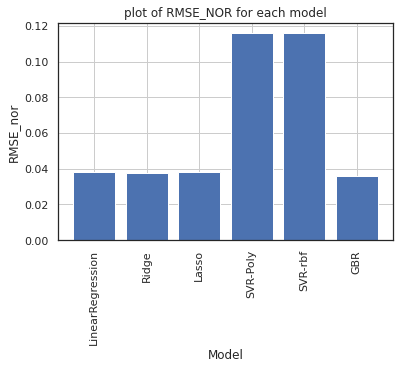

In [ ]:
plt.bar(results['model'],results['RMSE_NOR'])
plt.xlabel('Model')
plt.xticks(rotation ='vertical')
plt.ylabel('RMSE_nor')
plt.title('plot of RMSE_NOR for each model')
plt.grid(True)

# Optimization if any

In [ ]:
# Pritesh
# GBR has given lowest RSME = 0.0345 hence GBR's hyperparameter tuning is done
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import time

GBR = GradientBoostingRegressor()
# Round 1
parameters = {  'loss':['squared_error'],
                'learning_rate': [0.01,0.03,0.04],
                'subsample'    : [0.9, 0.5, 0.2],
                'n_estimators' : [400,800, 1200],
                'max_depth'    : [4,8,10]
                 }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 3, n_jobs=-1)
t1 = time.time()
grid_GBR.fit(X_train, y_train)
t2 = time.time()
print("Time taken for round 1 is", t2-t1," msec\n")
print(" Results from Grid Search Round 1 " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

Time taken for round 1 is 921.0109152793884  msec

 Results from Grid Search Round 1 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=800,
                          subsample=0.5)

 The best score across ALL searched params:
 0.8766650773066945

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 4, 'n_estimators': 800, 'subsample': 0.5}


In [ ]:
# Pritesh
# change all parameters except for best parameter
# Round 2
parameters_2 = {  'loss':['squared_error'],
                'learning_rate': [0.02,0.03],
                'subsample'    : [0.6, 0.5, 0.3],
                'n_estimators' : [400,800,850],
                'max_depth'    : [2,4,3]
                 }

grid_GBR_2 = GridSearchCV(estimator=GBR, param_grid = parameters_2, cv = 3, n_jobs=-1)
t1 = time.time()
grid_GBR_2.fit(X_train, y_train)
t2 = time.time()
print("Time taken for round 2 is", t2-t1," msec\n")
print(" Results from Grid Search Round 2 " )
print("\n The best estimator across ALL searched params:\n",grid_GBR_2.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR_2.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR_2.best_params_)

Time taken for round 2 is 212.7956247329712  msec

 Results from Grid Search Round 2 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=400,
                          subsample=0.5)

 The best score across ALL searched params:
 0.8727817574283807

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.5}


In [ ]:
grid = {
    "GridSearchCV Round":['GBR round 1', 'GBR round 2'],
    "best_learning_rate":[0.03,0.03],
    "max_depth":[4,4],
    "n_estimators":[800,400],
    "subsample":[0.5, 0.5],
    "best_score":[0.8776, 0.8727],
    "Normalised RMSE":[0.0345,0.0345]
}
grid_result = pd.DataFrame(grid)
grid_result

,GridSearchCV Round,best_learning_rate,max_depth,n_estimators,subsample,best_score,Normalised RMSE
0,GBR round 1,0.03,4,800,0.5,0.8776,0.0345
1,GBR round 2,0.03,4,400,0.5,0.8727,0.0345


In [ ]:
opt_reg = GradientBoostingRegressor(learning_rate = 0.03, loss= 'squared_error', max_depth =4, n_estimators= 800, subsample = 0.5)
opt_reg.fit(X_train, y_train)

# Training and Testing
y_pred = opt_reg.predict(X_test)

# Calculating MAE,MSE,RMSE,RMSE_nor
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
rmse_nor = RMSE/ (y.max() - y.min())

print("MAE: ", MAE,"\nMSE: ",MSE,"\nRMSE: ", RMSE, "\nRMSE_NOR :",rmse_nor)
model_results = pd.DataFrame([['GBR',MAE,MSE,RMSE,rmse_nor]],
                             columns = ['model','MAE','MSE','RMSE','RMSE_NOR'])
model_results

MAE:  14159.70079579311 
MSE:  505415342.75356543 
RMSE:  22481.444409858665 
RMSE_NOR : 0.03121989225087997


,model,MAE,MSE,RMSE,RMSE_NOR
0,GBR,14159.700796,5.054153e+08,22481.44441,0.03122


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = opt_reg, X= X_train, y = y_train,
                             cv = 10)
print("Gradient Boosting Regressor Accuracy after optimization : %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Gradient Boosting Regressor Accuracy after optimization : 0.86 (+/- 0.23)
